**We are going to create a Logistic Regression for the dataset Cancer. The dataset contains information to predict the  output variable i.e Malignant or Benign Tumour based on the independent variables**

In [276]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [277]:
#Load Dataset
df1 = pd.read_csv('./dataset.csv')
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [278]:
#to display the column names in the dataset
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [279]:
#to display the dataset values
df1.values

array([[87139402, 'B', 12.32, ..., 0.09391, 0.2827, 0.06771],
       [8910251, 'B', 10.6, ..., 0.07926, 0.294, 0.07587],
       [905520, 'B', 11.04, ..., 0.07431, 0.2998, 0.07881],
       ...,
       [873885, 'M', 15.28, ..., 0.1226, 0.3175, 0.09772],
       [911201, 'B', 14.53, ..., 0.1069, 0.2606, 0.0781],
       [9012795, 'M', 21.37, ..., 0.1966, 0.273, 0.08666]], dtype=object)

In [280]:
#to display the type of the dataset
type(df1) 

pandas.core.frame.DataFrame

In [281]:
#Identify number of Classes (i.e. Class)
df1.diagnosis.unique()

array(['B', 'M'], dtype=object)

In [282]:
# to successfully import (199 records)
df1.shape

(569, 32)

In [283]:
# To print the variable Class values
print("Feature Vector Data:")
print(df1.diagnosis)

Feature Vector Data:
0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: object


In [284]:
#to display all the columns and values in the dataset
display(df1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


**EDA : Exploratory Data Analysis**

In [285]:
#to find the key attributes
df1.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [286]:
# is there any missing data ?
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(199)

,Total,Percent
id,0,0.0
diagnosis,0,0.0
symmetry_worst,0,0.0
points_worst,0,0.0
concavity_worst,0,0.0
compactness_worst,0,0.0
smoothness_worst,0,0.0
area_worst,0,0.0
perimeter_worst,0,0.0
texture_worst,0,0.0


In [287]:
# Any missing values?
print(df1.isnull().values.any())

False


Class Split
B    357
M    212
Name: diagnosis, dtype: int64


Text(0, 0.5, 'Count')

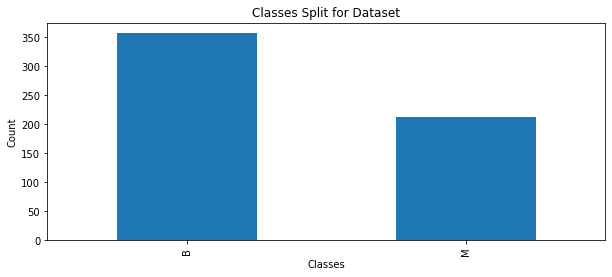

In [288]:
#Class Balance
print('Class Split')
print(df1['diagnosis'].value_counts())
df1['diagnosis'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [289]:
#Find Independent Column Correlations for Seeds dataset 
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(df1,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('perimeter_mean', 'radius_mean'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('concavity_mean', 'compactness_mean'), ('points_mean', 'radius_mean'), ('points_mean', 'perimeter_mean'), ('points_mean', 'area_mean'), ('points_mean', 'compactness_mean'), ('points_mean', 'concavity_mean'), ('perimeter_se', 'radius_se'), ('area_se', 'area_mean'), ('area_se', 'radius_se'), ('area_se', 'perimeter_se'), ('concavity_se', 'compactness_se'), ('dimension_se', 'compactness_se'), ('radius_worst', 'radius_mean'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'area_mean'), ('radius_worst', 'points_mean'), ('texture_worst', 'texture_mean'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'perimeter_mean'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'points_mean'), ('perimeter_worst', 'radius_worst'), ('area_worst', 'radius_mean'), ('area_worst', 'perimeter_mean'), ('area_worst', 'area_mean'), ('area_worst', 'points_mean'), ('area_

**The above input variables are highly correlated because they have the correlation between them greater than 80%.**

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_20428/3070951549.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df1.hist(ax=ax)


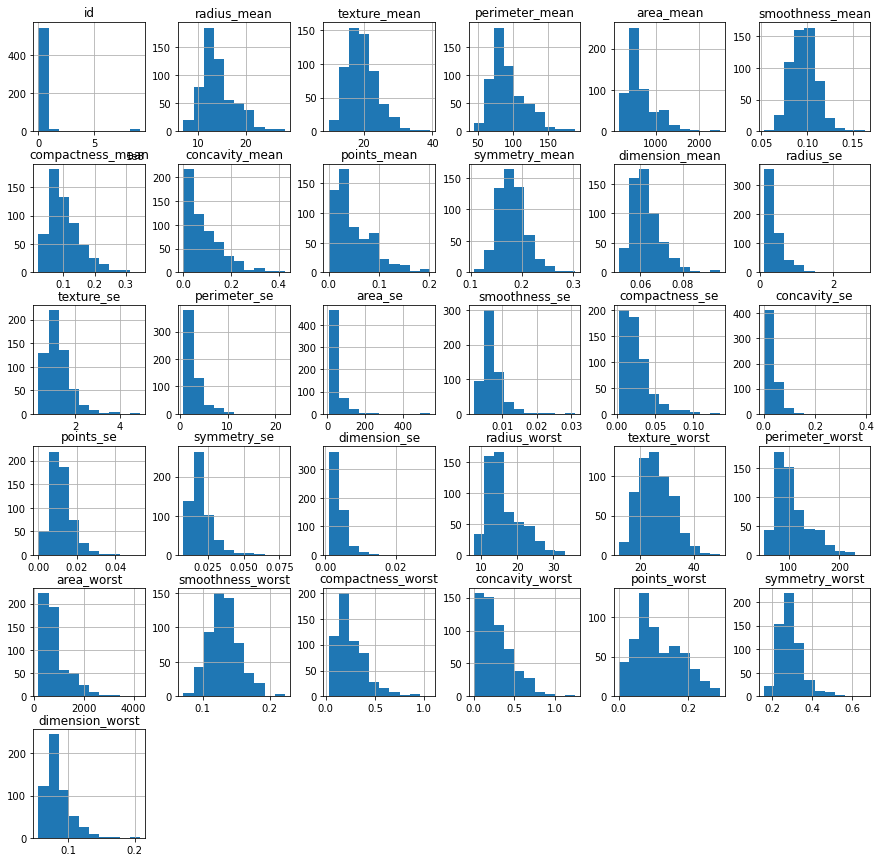

In [290]:
#Histogram visualizations for the Seeds dataset 
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df1.hist(ax=ax)
plt.show()

**Feature Selection**

In [310]:
x = df1.drop('diagnosis',axis=1).to_numpy()
y = df1['diagnosis'].to_numpy()

# Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=100)

In [324]:
# Implement Random Forest classifier
from sklearn.linear_model import LogisticRegression



# instantiate the model (using the default parameters)
Logreg = LogisticRegression(max_iter=3000)

# fit the model with data
LogReg.fit(x_train,y_train)

#prediction
y_pred=LogReg.predict(x_test)

In [325]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.631578947368421


**The accuracy value is 63%. This tells that this model detects the type of the tumour correctly about 63%**

**Cross Validation**

In [326]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [330]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('LogReg',  LogisticRegression(max_iter=3000)))

In [331]:
# Train/Test split
x_train_cross, x_test_cross, y_train_cross, y_test_cross = train_test_split(x, y, stratify = df1.diagnosis, random_state=0)

In [332]:
#To display the accuracy value
names = []
scores = []

for name, model in models:
    model.fit(x_train_cross, y_train_cross)
    y_pred_cross = model.predict(x_test_cross)
    scores.append(accuracy_score(y_test_cross, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

     Name     Score
0     KNN  0.706294
1      DT  0.937063
2  LogReg  0.370629


In [333]:
#To display the accuracy value using cross val
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, x, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

     Name     Score
0     KNN  0.769799
1      DT  0.915508
2  LogReg  0.627412


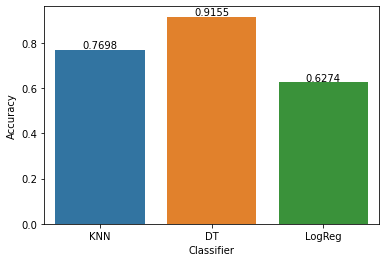

In [334]:
#To display the accuracy values in terms of Box plot
import seaborn as sns
import matplotlib.pyplot as plt

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

**The above output shows that Decision Tree has the best accuracy among the three models**

**Decision Tree is a very powerful model. In this model development we had achieved a accuracy score of 91.5%. But we are not confident enough of the accuracy score obtained in this because dataset doesn't contain enough data values to create a trustable predictor. So, we need to use a dataset of more number of samples to be sure about the accuracy score obtained.**